Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "In Wai Cheong"
COLLABORATORS = ""

---

In [2]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

# HW 7:  Linear Algebra Part 1

# Question 1: Equivalence of Norms

Vector and matrix $p$-norms are related by various inequalities, often involving the dimensions $m$ or $n$.  For each of the following, verify the inequality and give an example of a nonzero vector or matrix (for general $m$ and $n$) for which equality is achieved.  In this problem $x \in \mathbb R^m$ and $A \in \mathbb R^{m \times n}$.

**(a)** [4] Show that $$||x||_\infty \leq ||x||_2$$

## Solution

We have that:

$$
||x||_2 = \sqrt{\sum x_i^2} = \sqrt{\sum |x_i|^2}
$$

And then:
|
$$
||x||_\infty^2 \leq \sum |x_i|^2 = ||x||_2^2 \rightarrow ||x||_\infty \leq ||x||_2
$$

**(b)** [4]  Show that $$||x||_2 \leq \sqrt{m} ||x||_\infty$$

## Solution

$$
\lVert x\rVert_2^2 = \sum_{i=1}^m x_i^2 \leq m\cdot\max_{1\leq i\leq m} x_i^2 = m(\max_{1\leq i\leq m} |x_i|)^2 = m\lVert x\rVert_\infty^2
$$

**(c)** [4] show that  $$||A||_\infty \leq \sqrt{n} ||A||_2$$

## Solution

Define $e$ to be a column matrix consisting of entries of $1$, then:

$$
||A||_\infty = \max_{i} \sum_{j=1}^N|a_{ij}| = ||Ae||_\infty \leq ||Ae||_2 \leq ||A||_2||e||_2 = \sqrt{n}||A||_2
$$

#### **(d)** [4] Show that $$||A||_2 \leq \sqrt{m} ||A||_\infty$$

## Solution

We established that:

$$||A||_\infty \leq \sqrt{n} ||A||_2$$

Then:

$$
\frac{1}{\sqrt{n}}||A||_\infty \leq ||A||_2  \leq \sqrt{M}||A||_\infty
$$


## Question 2: Matrix Norms and Condition Numbers

Consider the Matrices

$$
    A = \begin{bmatrix} 1 & 1 \\
                        1 & a \\
         \end{bmatrix} \quad\quad
     A^{-1} = \frac{1}{a-1}\begin{bmatrix} a & -1 \\
                        -1 & 1 \\
         \end{bmatrix} 
$$
where $a\in\mathbb{R}$

**(a)** [6] Analytically calculate, as a function of $a$

* the induced $p$-norm $||A||_p$ 
* the $p$ condition number $\kappa_p(A) =||A||_p||A^{-1}||_p$ 

consider  $p=1,2,\infty$

(hint: for a symmetric matrix, the singular values are equal to the absolute value of the eigenvalues of $A$ (sorted from largest to smallest))

## Solution

If we want to compute the $1$-norm or $\infty$-norm of $A$, it would just be $\fbox{$\max(2,1+|a|)$}$.

If we want to compute the $2$-norm of $A$, we first find the eigenvalues, which are:

$$
\lambda_1 = \frac{1}{2} (-\sqrt{a^2 - 2 a + 5} + a + 1) \\
\lambda_2 = \frac{1}{2} (\sqrt{a^2 - 2 a + 5} + a + 1) 
$$

Then the $2$-norm will just be $\fbox{$||A||_2=\max(|\lambda_1|,|\lambda_2)$|}$

The eigenvalues of $A^-1$ are:

$$
\lambda_3 = \frac{\sqrt{a^2-2a+5}+a+1}{2(a-1)} \\
\lambda_4 = \frac{-\sqrt{a^2-2a+5}+a+1}{2(a-1)}
$$

If we want $\kappa_1(A)$, or $\kappa_\infty(A)$, then we will just do $\fbox{$\max(|\frac{a}{a-1}|+\frac{1}{|a-1|}, \frac{1}{|a-1|}+|\frac{1}{a-1}|)$}$

If we want $\kappa_2(A)$, then we will just do:


$\fbox{$\kappa_2(A) = \max(|\lambda_1|,|\lambda_2|)\cdot \max(|\lambda_3|,|\lambda_4|)$}$


**(b)** [6] write two short python routine that returns $||A||_p$, and $\kappa_p(A)$ for the matrices in part (a). Again, just consider $p=1,2,\infty$) and raise a ValueError if $p$ is any other value.

In [3]:
def mypnorm(a, p ):
    """
    return ||A||_p for A = [[ 1, 1],
                            [ 1, a]]
                            
    for p=1, 2, or numpy.infty
    
    parameters:
    -----------
    
    a: scalar 
        value of a
    p: scalar
        1, 2 or np.infty
    returns:
    --------
    pnorm(a)
    
    raises:
    --------
    ValueError:  if p is not in [ 1, 2, numpy.infty]
    """
    # YOUR CODE HERE
    
    eigenA1 = numpy.abs(0.5*(numpy.sqrt(a**2-2*a+5)+a+1))
    eigenA2 = numpy.abs(0.5*(-numpy.sqrt(a**2-2*a+5)+a+1))
        
    if p not in [1,2,numpy.infty]:
        raise ValueError()
    elif p==1 or p==numpy.infty:
        return numpy.max([2,1+abs(a)])
    elif p==2:
        return numpy.max([eigenA1,eigenA2])

        
           
    
def mycond(a, p):
    """
    eigen3 and eigen4 are the eigenvalues of the inverse of A
    """
    # YOUR CODE HERE
    eigenA1 = numpy.abs(0.5*(numpy.sqrt(a**2-2*a+5)+a+1))
    eigenA2 = numpy.abs(0.5*(-numpy.sqrt(a**2-2*a+5)+a+1))
    eigenA3 = numpy.abs((numpy.sqrt(a**2-2*a+5)+a+1) / (2*(a-1)))
    eigenA4 = numpy.abs((-numpy.sqrt(a**2-2*a+5)+a+1) / (2*(a-1)))
    
    a1 = abs(a/(a-1))
    a2 = 1/abs(a-1)
    a3 = abs(1/(a-1))
    
   
    if p not in [1,2,numpy.infty]:
        raise ValueError()
    elif p==1 or p==numpy.infty:
        return numpy.max([2,1+abs(a)]) * numpy.max([a1+a2, a2+a3])
    elif p==2:
        return (max(eigenA1,eigenA2)*max(eigenA3,eigenA4))
        


In [4]:
A = lambda a: numpy.array([ [ 1, 1], [1, a]])
aa = numpy.array([ -2, 0, 1.0001, 2])


for p in [ 1, 2, numpy.infty]:
    normp = [ mypnorm(a, p) for a in aa]
    test = [ numpy.linalg.norm(A(a), ord=p) for a in aa]    
    print('||A||_{} = {}'.format(p, normp))
    numpy.testing.assert_allclose(normp,test)
print('Successful Norm test')

for p in [ 1, 2, numpy.infty]:
    condp = [ mycond(a, p) for a in aa]
    test = [ numpy.linalg.cond(A(a), p) for a in aa]    
    print('k(A)_{} = {}'.format(p, condp))
    numpy.testing.assert_allclose(condp,test)
print('Successful condition number test')

# test the exception
try:
    mypnorm(0.,4)
except ValueError as err:
    print('Success: you caught the ValueError')
else:
    assert False, 'whoops, missed the exception'


||A||_1 = [3.0, 2.0, 2.0000999999999998, 3.0]
||A||_2 = [2.302775637731995, 1.618033988749895, 2.00005000125, 2.618033988749895]
||A||_inf = [3.0, 2.0, 2.0000999999999998, 3.0]
Successful Norm test
k(A)_1 = [3.0, 4.0, 40004.0001000044, 9.0]
k(A)_2 = [1.7675918792439984, 2.618033988749895, 40002.00007500565, 6.854101966249685]
k(A)_inf = [3.0, 4.0, 40004.0001000044, 9.0]
Successful condition number test
Success: you caught the ValueError


 **(c)** [4] Make a plot comparing $\log(\kappa(A))$ vs $a$ for the different matrix norms over the range $a\in[-15,15]$. (you can check it by plotting `numpy.linalg.cond(A, ord)` as well. As always, make it pretty.
 


Text(0, 0.5, '$log(\\kappa(A))$')

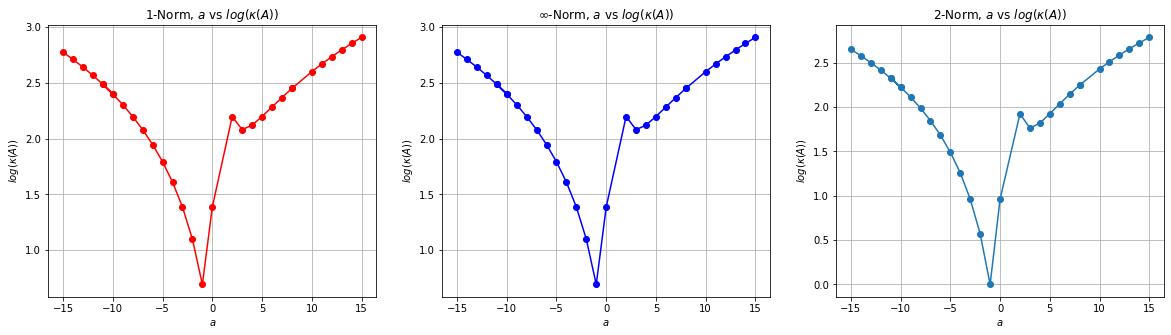

In [5]:
# YOUR CODE HERE
a = [-15,-14,-13,-12,-11,-10,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,2,3,4,5,6,7,8,8,10,11,12,13,14,15]
x = []
y = []
z = []

fig = plt.figure(figsize=(20,5))

## 1 Norm

for i in a:
    x.append(numpy.log(mycond(i,1)))

axes = fig.add_subplot(1,3,1)
axes.plot(a,x,'ro-')
axes.grid()
axes.set_title("1-Norm, $a$ vs $log(\kappa(A))$")
axes.set_xlabel('$a$')
axes.set_ylabel('$log(\kappa(A))$')

## Inf-Norm

for i in a:
    y.append(numpy.log(mycond(i,numpy.infty)))

axes = fig.add_subplot(1,3,2)
axes.plot(a,y,'bo-')
axes.grid()
axes.set_title("$\infty$-Norm, $a$ vs $log(\kappa(A))$")
axes.set_xlabel('$a$')
axes.set_ylabel('$log(\kappa(A))$')

## 2-norm

for i in a:
    z.append(numpy.log(mycond(i,2)))

axes = fig.add_subplot(1,3,3)
axes.plot(a,z,'o-')
axes.grid()
axes.set_title("2-Norm, $a$ vs $log(\kappa(A))$")
axes.set_xlabel('$a$')
axes.set_ylabel('$log(\kappa(A))$')

**(d)** [8] Given your plot comment on the following:
* What value of $a$ gives the best conditioned matrix.  Why?
* What value of $a$ gives the least well-condition matrix.  Why?
* Does it matter which norm we measure the condition number in?
* What value of $a$ gives the best conditioned matrix for $a>1$
 

## Solution

When $a=-1$, we get the best conditioned matrix, and when $a=15$, we get the least well-conditioned matrix. <br>

Yes, the scaling on the y-axis is different even though the general shape is the same. <br> For example, the condition number when $a=-1$ is $0$ in the $2$-norm, but that's
not the case for the $1$-norm or the $\infty$-norm. <br>

When $a>1$, the value in which we get the best conditioned matrix is $a=3$

#### **(e)** [6] The Geometry of matrix Norms

Let's explore the geometrical relationship implied by the induce matrix $p$-norm which can be viewed as a measure of how much the $A\mathbf{x}$ distorts the 'unit-ball' 

$$\{ \mathbf{x}\in\mathbb{R}^n:   \forall\, ||\mathbf{x}||_p=1\}$$

I will provide a routine to plot the unit ball and the image of $A$ acting on the unit ball here (modified from some cool routines by Kyle Mandli)

In [6]:
def unit_ball_image(axes, A, ord, title=True):
    """Plot  the unit ball and its image under the tranformation resulting from *A* 
    and return an estimate of the matrix norm 
    
    :Input:
     - *axes* (matplotlib.axes) Axes to plot on
     - *A* (ndarray) Matrix that represents the mapping (transformation)
     - *ord* (float) The norm requested.
     
    :Output:
     - (float) Maximum norm estimate (i.e. the matrix norm)
    """    
    # construct the unit ball and extract points on the 1-contour
    N = 100
    X, Y = numpy.meshgrid(numpy.linspace(-1.1, 1.1, N), numpy.linspace(-1.1, 1.1, N))
    V = numpy.empty((N, N))
    for i in range(N):
        for j in range(N ):
            V[i, j] = numpy.linalg.norm(numpy.array([X[i, j], Y[i, j]]), ord=ord)
    contourset = axes.contour(X, Y, V, 'w', levels=[1])
    
    # nifty matplotlib trick for extracting the coordinates of the contour
    ball = contourset.allsegs[0][0]
    axes.plot(ball[:,0], ball[:,1],'b')
    
    # calculate the image of the unit ball under A and plot it
    image = A.dot(ball.T).T
    axes.plot(image[:,0],image[:,1],'r')

    # estimate the norm
    max_norm = numpy.max(numpy.linalg.norm(image, ord=ord, axis=1))
    
    #prettify
    axes.grid()
    #axes.legend(['a', 'b'],loc='best')
    axes.legend(['$||\mathbf{{x}}||_{}=1$'.format(ord), '$||A\\mathbf{{x}}||_{}$'.format(ord)], loc='best')
    if title:
        axes.set_title('$||A||_{}\\approx{:3.5f}$'.format(ord,max_norm))
   
    return max_norm
    

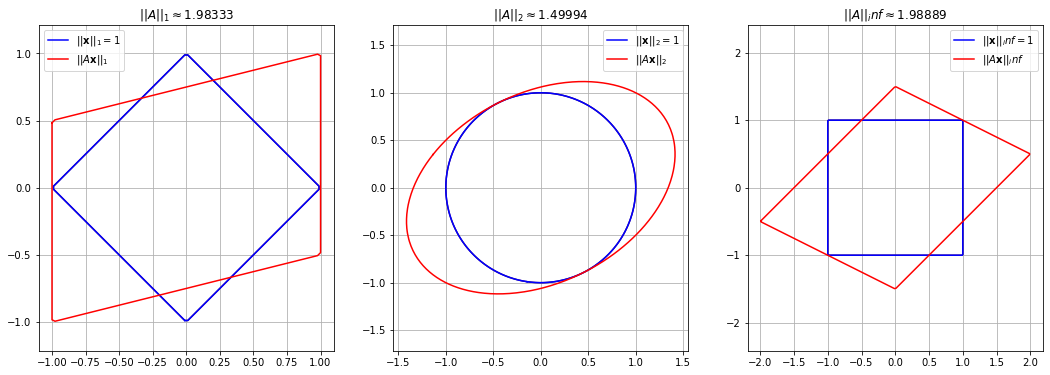

In [7]:
# an Example comparing the behavior of the 1-norm, 2-norm and inf-norm
a=-0.5
fig = plt.figure(figsize=(18,6))
axes = fig.add_subplot(1,3,1, aspect='equal', adjustable='datalim')
max_norm = unit_ball_image(axes, A(a), 1)
axes = fig.add_subplot(1,3,2, aspect='equal', adjustable='datalim')
max_norm = unit_ball_image(axes, A(a), 2)
axes = fig.add_subplot(1,3,3, aspect='equal', adjustable='datalim')
max_norm = unit_ball_image(axes, A(a), numpy.inf)

plt.show()


Use this routine to make a figure comparing $||A(a)||_p$ and $||A^{-1}(a)||_p$ for $p=1,2,\infty$ and
* the best conditioned value of $a$
* a=1.08 (or as close to singular as you want to go). Can you explain why all the norms agree as $a\rightarrow1$?
* the best conditioned value of $a>1$

In [8]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

YOUR ANSWER HERE

## Question 3: Fun with the QR

**(a)** [4] - Why we use the $QR$ factorization for least-squares.

Consider the two equivalent problems to solve for the least-squares solution $\hat{\mathbf{x}}$

The Normal Equations
$$
    A^TA\hat{\mathbf{x}} = A^T\mathbf{b}
$$

and using the $QR$ factorization with $A=QR$
$$
\quad R\hat{\mathbf{x}}=Q^T\mathbf{b}
$$


* Show that the condition number of $A^TA$ is the square of that of $A$ (i.e.$\kappa_2(A^T A)$ = $\kappa_2^2(A)$).  Hint: use the SVD $A=U\Sigma V^T$
* Show that $\kappa_2(R) = \kappa_2(A)$

so that solving using the $QR$ factorization is much more stable with respect to floating point error.

YOUR ANSWER HERE

**(b)** [8] - The Householder reflection matrix, 

$$
    H = I - 2\mathbf{q}\mathbf{q}^T
$$

reflects a vector $x$ across a mirror plane normal to a unit vector $\mathbf{q}$ and is an essential ingredient in many numerical methods.

Demonstrate the following properties of $H$

* $H$ is symmetric
* $H$ is Unitary
* $H$ is not a projection matrix
* if $\mathbf{x}$ is in $\mathbb{R}^n$,  the Matrix-vector product $H\mathbf{x}$ can be computed in $O(n)$ operations
* Repeated application of householder matrices to transform $A\rightarrow R$ do not change the condition number (i.e. $\kappa_2(HA) = \kappa_2(A) = \kappa_2(R)$

## Solution

$\cdot$To show it is symmetric:

$$
H^T = (I - 2\mathbf{qq}^T)^T = I^T - 2(\mathbf{qq}^T)^T = I - 2(\mathbf{q}^T)^T\mathbf{q}^T = I - 2\mathbf{qq}^T = H
$$

$\cdot$To show it is unitary, we first notice that the householder transformation essentially turns a unit cube inside out along one axis, so we have a determinant of $-1$. <br>
$|det(H)|=1$ so it is unitary.

$\cdot$To show $H$ is not a projection matrix, we show that $HH \neq H$:

$$
HH = (I-2\mathbf{qq}^T)(I-2\mathbf{qq}^T) = I-4\mathbf{qq}^T + 4\mathbf{qq}^T\mathbf{qq}^T = I - I-4\mathbf{qq}^T + 4\mathbf{qq}^T = I
$$

**(c)** [10] - To understand the basic algorithm's better,  construct by hand matrices $Q$ and $R$ such that $A=QR$ for 

$$
    A = \begin{bmatrix} 1 & 1 & 1\\ 1 & 0 & 0 \\ 1 & 1 & 0  \\ 1 & 0 & 0 \\ \end{bmatrix} 
$$

Using

* modified Gram-Schmidt  $A\rightarrow Q$,   $R = Q^T A$
* Householder reflections $A\rightarrow R$, $Q=(H_2 H_1)^T$ (i.e. $Q^T = H_2 H_1$)

You can use any python/numpy routines to check your answers

## Solution

$$
q_1'=a_1=
\begin{bmatrix}
1 \\
1 \\
1 \\
1 \\
\end{bmatrix}
$$

The norm of that is just $2$, i.e $r_{11}=2$ so:
$$
q_1 = \frac{1}{2}
\begin{bmatrix}
1 \\
1 \\
1 \\
1 \\
\end{bmatrix}
$$

$$
r_{12}= q_1^T \cdot a_2 =
\begin{bmatrix}
\frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} 
\end{bmatrix}
\begin{bmatrix}
1 \\
0 \\
1 \\
0 \\
\end{bmatrix} = 1
$$

$$
q_2' = a_2 -r_{12} \cdot q_1 =
\begin{bmatrix}
\frac{1}{2} \\
-\frac{1}{2} \\
\frac{1}{2} \\
-\frac{1}{2} \\
\end{bmatrix}
$$

The norm of $q_2'$ is $1$ so $q_2' = q_2$. We then have that:

$$
r_{13}= r_{23} = 0.5
$$

$$
q_3' = a_3 - r_{13}\cdot q_1 - r_{23} \cdot q_2 = 
\begin{bmatrix}
\frac{1}{2} \\
0 \\
-\frac{1}{2} \\
0 \\
\end{bmatrix}
$$

$r_{33} = \sqrt{0.5} = 0.7071$, so:

$$
q_3 = 
\begin{bmatrix}
0.7071 \\
0 \\
0.7071 \\
0 \\
\end{bmatrix}
$$

Then:

$$
Q = [q_1,q_2,q_3] = 
\begin{bmatrix}
\frac{1}{2} & \frac{1}{2} & 0.7071 \\
\frac{1}{2} & -\frac{1}{2} & 0\\
\frac{1}{2} & \frac{1}{2} & -0.7071\\
\frac{1}{2} & -\frac{1}{2} & 0 \\
\end{bmatrix}
$$

And:

$$
R = 
\begin{bmatrix}
r_{11} & r_{12} & r_{13} \\
0 & r_{22} & r_{23} \\
0 & 0 & r_{33}
\end{bmatrix}
=
\begin{bmatrix}
2 & 1 & \frac{1}{2} \\
0 & 1 & \frac{1}{2} \\
0 & 0 & 0.7071
\end{bmatrix}
$$

Routine calculation shows that:

$$
\begin{bmatrix}
\frac{1}{2} & \frac{1}{2} & 0.7071 \\
\frac{1}{2} & -\frac{1}{2} & 0\\
\frac{1}{2} & \frac{1}{2} & -0.7071\\
\frac{1}{2} & -\frac{1}{2} & 0 \\
\end{bmatrix}
\begin{bmatrix}
2 & 1 & \frac{1}{2} \\
0 & 1 & \frac{1}{2} \\
0 & 0 & 0.7071
\end{bmatrix}
= \begin{bmatrix} 1 & 1 & 1\\ 1 & 0 & 0 \\ 1 & 1 & 0  \\ 1 & 0 & 0 \\ \end{bmatrix} 
$$

**(c)** [10] - Modify the $QR$ factorization by Householder reflection given in class `householder_QR` to write a function to solve linear least-squares problems, i.e. use repeated Householder reflections to transform

$$
    A\mathbf{x} = \mathbf{b}
$$

to

$$ R\mathbf{x} = \mathbf{c} $$

where $\mathbf{c} = Q^T\mathbf{b}$.  Then solve the last equation for $\mathbf{x}$ using `numpy.linalg.solve` (which implements a $LU$ decomposition for Gaussian elimination).


In [ ]:
# Implementation of Householder QR, for least-squares
def mylstq(A, b):
    """
    Solves the leastsquares problem Ax = b, by Householder reduction to Rx = c,
    then solve Rx = c, using numpy.linalg.solve()
    
    fill in the rest of the doc-string properly
    
    usage:  x = mylstq(A, b)
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    return x

In [ ]:
# Test this on the previous problem
A = numpy.array([ [ 1., 1., 1.],
                  [1., 0., 0.],
                  [1., 1., 0.],
                  [1., 0., 0.]])
b = numpy.array([ 3., -2., 1., 0.])

x = mylstq(A,b)
x_np = numpy.linalg.lstsq(A,b,rcond = None)[0]
print('my solution = {}'.format(x))
print('numpy.lstq  = {}'.format(x_np))
numpy.testing.assert_allclose(x, x_np)
print('Success!')

**(d)** [6] - Use your routine to find the best fit of the function 

$$
    y = c_1 x + c_2e^{x}
$$ 
through the $(x, y)$ data points $(1,2)$, $(2,3)$, $(3,5)$, $(4,10)$, $(5,15)$.

* Make a plot comparing the best fit function to the data over the interval $x \in [0, 6]$.
* What is the norm of the residual $||\mathbf{r}||_2$ for $\mathbf{r} = \mathbf{y}_{data} - \mathbf{y}_{model}(x)$?
* Would you trust extrapolating this model to larger values of $x$? (no right answer here)
* **Extra Credit** Explore the behavior of fitting polynomials of different orders.  Are these any better?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()